In [19]:
# CONVERTING JSON TO YOLO FORMAT

In [20]:
import os
import json

def convert_coco_to_yolo(coco_path, output_dir, image_folder):
    # Load the COCO JSON
    with open(coco_path, 'r') as f:
        data = json.load(f)

    os.makedirs(output_dir, exist_ok=True)

    # Build lookup for categories
    categories = {cat['id']: cat['name'] for cat in data['categories']}
    name_to_id = {v: k for k, v in categories.items()}

    # Build lookup for image id to file name and size
    image_info = {img['id']: img for img in data['images']}

    # Build a lookup to collect annotations per image
    annotations_by_image = {}
    for ann in data['annotations']:
        img_id = ann['image_id']
        annotations_by_image.setdefault(img_id, []).append(ann)

    for img_id, annotations in annotations_by_image.items():
        img_info = image_info[img_id]
        width = img_info['width']
        height = img_info['height']
        file_name = os.path.splitext(img_info['file_name'])[0]
        label_file_path = os.path.join(output_dir, f"{file_name}.txt")

        with open(label_file_path, 'w') as f:
            for ann in annotations:
                cat_id = ann['category_id']
                bbox = ann['bbox']  # [x_min, y_min, width, height]

                # Convert to YOLO format
                x_center = (bbox[0] + bbox[2] / 2) / width
                y_center = (bbox[1] + bbox[3] / 2) / height
                w = bbox[2] / width
                h = bbox[3] / height

                yolo_class = cat_id - min(categories.keys())  # Make sure classes are 0-indexed
                f.write(f"{yolo_class} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")

    print(f"✅ COCO annotations converted to YOLO format in: {output_dir}")


In [21]:
# for train set

In [22]:
convert_coco_to_yolo(
    coco_path=r"C:/Users/rakshita/parking/datasets/PKLot/train/_annotations.coco.json",
    output_dir=r"C:/Users/rakshita/parking/datasets/PKLot/train/labels",
    image_folder=r"C:/Users/rakshita/parking/datasets/PKLot/train/images"
)


✅ COCO annotations converted to YOLO format in: C:/Users/rakshita/parking/datasets/PKLot/train/labels


In [26]:
# class ID fixer script

import os

label_folder = r"C:/Users/rakshita/parking/datasets/PKLot/train/labels"

for filename in os.listdir(label_folder):
    if filename.endswith(".txt"):
        path = os.path.join(label_folder, filename)
        updated_lines = []
        with open(path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                class_id = int(parts[0])
                if class_id == 1:
                    new_id = 0  # space-empty
                elif class_id == 2:
                    new_id = 1  # space-occupied
                else:
                    print(f"❌ Unexpected class ID {class_id} in {filename}")
                    continue
                updated_line = " ".join([str(new_id)] + parts[1:])
                updated_lines.append(updated_line)
        with open(path, 'w') as f:
            f.write("\n".join(updated_lines))

print("✅ Fixed class IDs: 1→0, 2→1 in all label files.")


✅ Fixed class IDs: 1→0, 2→1 in all label files.


In [31]:
# for valid set

In [32]:
convert_coco_to_yolo(
    coco_path=r"C:/Users/rakshita/parking/datasets/PKLot/valid/_annotations.coco.json",
    output_dir=r"C:/Users/rakshita/parking/datasets/PKLot/valid/labels",
    image_folder=r"C:/Users/rakshita/parking/datasets/PKLot/valid/images"
)


✅ COCO annotations converted to YOLO format in: C:/Users/rakshita/parking/datasets/PKLot/valid/labels


In [33]:
# class ID fixer script

import os

label_folder = r"C:/Users/rakshita/parking/datasets/PKLot/valid/labels"

for filename in os.listdir(label_folder):
    if filename.endswith(".txt"):
        path = os.path.join(label_folder, filename)
        updated_lines = []
        with open(path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                class_id = int(parts[0])
                if class_id == 1:
                    new_id = 0  # space-empty
                elif class_id == 2:
                    new_id = 1  # space-occupied
                else:
                    print(f"❌ Unexpected class ID {class_id} in {filename}")
                    continue
                updated_line = " ".join([str(new_id)] + parts[1:])
                updated_lines.append(updated_line)
        with open(path, 'w') as f:
            f.write("\n".join(updated_lines))

print("✅ Fixed class IDs: 1→0, 2→1 in all label files.")


✅ Fixed class IDs: 1→0, 2→1 in all label files.


In [ ]:
# QUICK SANITY CHECKER !!!!!!!!!

In [23]:
# Verify the Converted YOLO Annotations

In [27]:
import cv2
import matplotlib.pyplot as plt

def show_yolo_annotations(image_path, label_path, class_names):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        cls_id, x, y, bw, bh = map(float, line.strip().split())
        cls_id = int(cls_id)
        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)

        color = (0, 255, 0) if cls_id == 0 else (255, 0, 0)  # Green for empty, Red for occupied
        label = class_names[cls_id]
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("YOLO Annotations (Green = Empty, Red = Occupied)")
    plt.show()


In [ ]:
# train set

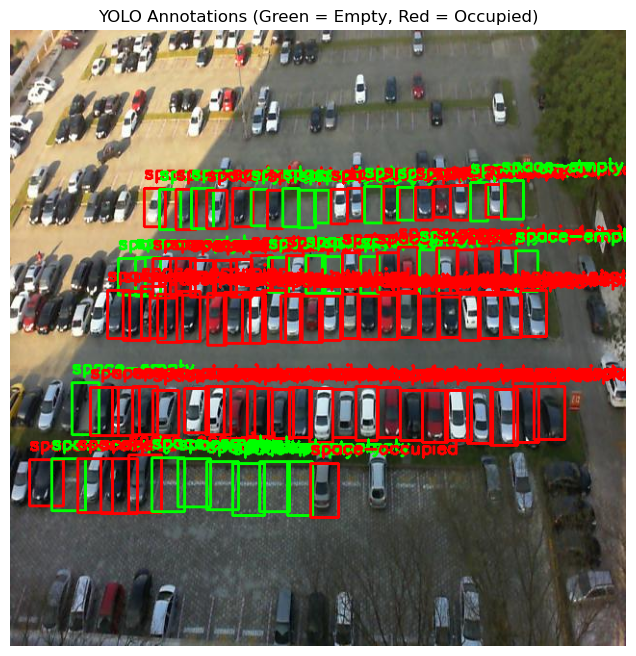

In [28]:
img_path = r"C:/Users/rakshita/parking/datasets/PKLot/train/images/2012-09-11_16_34_18_jpg.rf.c7f0037f799f9fc4e0d32081e1f12ba4.jpg"
label_path = r"C:/Users/rakshita/parking/datasets/PKLot/train/labels/2012-09-11_16_34_18_jpg.rf.c7f0037f799f9fc4e0d32081e1f12ba4.txt"

class_names = ["space-empty", "space-occupied"]

show_yolo_annotations(img_path, label_path, class_names)


In [36]:
# valid set

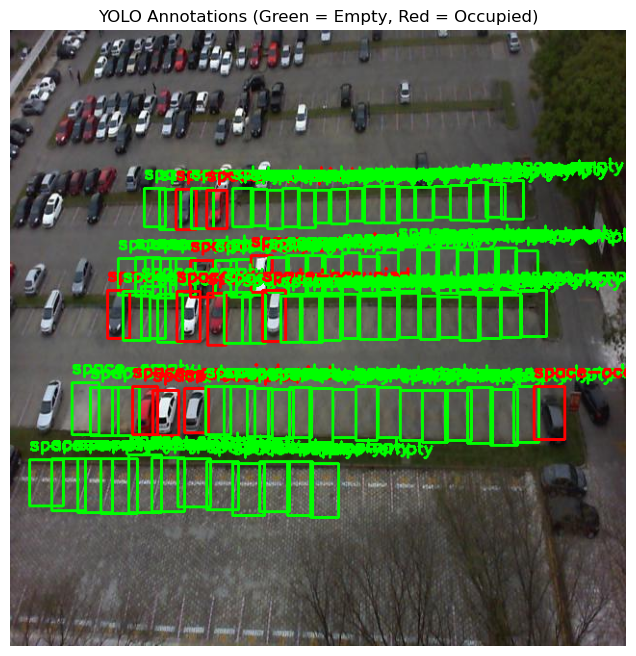

In [37]:
img_path = r"C:/Users/rakshita/parking/datasets/PKLot/valid/images/2012-09-12_07_18_22_jpg.rf.79ce4671b826968ea404225a994906d8.jpg"
label_path = r"C:/Users/rakshita/parking/datasets/PKLot/valid/labels/2012-09-12_07_18_22_jpg.rf.79ce4671b826968ea404225a994906d8.txt"

class_names = ["space-empty", "space-occupied"]

show_yolo_annotations(img_path, label_path, class_names)

In [ ]:
# Label Integrity Checker Script

In [29]:
import os

def check_label_integrity(label_dir, allowed_ids={0, 1}):
    print(f"🔍 Scanning labels in: {label_dir}")
    issues_found = False

    for filename in os.listdir(label_dir):
        if filename.endswith(".txt"):
            file_path = os.path.join(label_dir, filename)
            with open(file_path, 'r') as f:
                for i, line in enumerate(f.readlines()):
                    parts = line.strip().split()
                    if not parts:
                        continue
                    try:
                        class_id = int(parts[0])
                        if class_id not in allowed_ids:
                            print(f"❌ Invalid class ID {class_id} in {filename} (line {i+1})")
                            issues_found = True
                    except ValueError:
                        print(f"❌ Non-integer class ID in {filename} (line {i+1}): {parts[0]}")
                        issues_found = True

    if not issues_found:
        print("✅ All labels are clean and use only allowed class IDs:", allowed_ids)


In [ ]:
# train  set

In [30]:
check_label_integrity(r"C:/Users/rakshita/parking/datasets/PKLot/train/labels")


🔍 Scanning labels in: C:/Users/rakshita/parking/datasets/PKLot/train/labels
✅ All labels are clean and use only allowed class IDs: {0, 1}


In [34]:
# valid set

In [35]:
check_label_integrity(r"C:/Users/rakshita/parking/datasets/PKLot/valid/labels")

🔍 Scanning labels in: C:/Users/rakshita/parking/datasets/PKLot/valid/labels
✅ All labels are clean and use only allowed class IDs: {0, 1}


In [38]:
## MODEL TRAINING

In [3]:
from ultralytics import YOLO

In [40]:
model = YOLO("yolov8n.yaml")

In [41]:
model.train(data="C:/Users/rakshita/parking/datasets/PKLot/dataset.yaml", epochs=20, imgsz=320, batch=4, device="cpu")

New https://pypi.org/project/ultralytics/8.3.106 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.91  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=C:/Users/rakshita/parking/datasets/PKLot/dataset.yaml, epochs=20, time=None, patience=100, batch=4, imgsz=320, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

train: Scanning C:\Users\rakshita\parking\datasets\PKLot\train\labels... 8502 images, 189 backgrounds, 0 corrupt: 100%|


train: New cache created: C:\Users\rakshita\parking\datasets\PKLot\train\labels.cache


val: Scanning C:\Users\rakshita\parking\datasets\PKLot\valid\labels... 2424 images, 59 backgrounds, 0 corrupt: 100%|███


val: New cache created: C:\Users\rakshita\parking\datasets\PKLot\valid\labels.cache
Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      3.704      2.116      2.009        261        320: 100%|██████████| 2173/2173 [10:23<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316       0.62       0.72       0.73      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.875      1.016      1.091        252        320: 100%|██████████| 2173/2173 [09:57<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.898      0.912      0.951      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.519     0.8002     0.9889        200        320: 100%|██████████| 2173/2173 [09:50<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.922      0.934      0.966      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.353     0.7152     0.9477        225        320: 100%|██████████| 2173/2173 [09:47<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.944      0.952       0.97      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.246     0.6557     0.9233        211        320: 100%|██████████| 2173/2173 [09:49<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.944      0.958       0.97        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.164     0.6153     0.9059        247        320: 100%|██████████| 2173/2173 [10:11<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [02:


                   all       2483     143316      0.951      0.963      0.975       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.115     0.5908     0.8965         62        320: 100%|██████████| 2173/2173 [16:32<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [02:


                   all       2483     143316      0.956      0.963      0.977      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G       1.07     0.5719     0.8882        330        320: 100%|██████████| 2173/2173 [11:39<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.954      0.966      0.976      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.032     0.5554     0.8812        202        320: 100%|██████████| 2173/2173 [10:10<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.959      0.967      0.977      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.9953     0.5366     0.8731        151        320: 100%|██████████| 2173/2173 [10:11<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.959      0.967      0.979      0.782
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.8695     0.4963     0.8604        234        320: 100%|██████████| 2173/2173 [09:27<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316       0.96      0.971      0.982      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.8205     0.4771     0.8507        219        320: 100%|██████████| 2173/2173 [09:28<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.961       0.97      0.984      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.7824     0.4608     0.8445        156        320: 100%|██████████| 2173/2173 [09:29<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.961      0.971      0.985      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.7579     0.4506     0.8395        108        320: 100%|██████████| 2173/2173 [09:30<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.958      0.972      0.988       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.7377     0.4425     0.8374        164        320: 100%|██████████| 2173/2173 [09:31<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.962      0.972      0.988      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.7193     0.4284     0.8332        164        320: 100%|██████████| 2173/2173 [09:32<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.961      0.973       0.99      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.6993     0.4241      0.831        180        320: 100%|██████████| 2173/2173 [09:32<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.962      0.973       0.99      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.6806     0.4168     0.8279        238        320: 100%|██████████| 2173/2173 [09:30<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.959      0.974      0.991      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.6674      0.409     0.8269        167        320: 100%|██████████| 2173/2173 [09:30<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.962      0.973      0.991      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.6536     0.4061     0.8256         96        320: 100%|██████████| 2173/2173 [09:33<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.963      0.973      0.991      0.855

20 epochs completed in 3.859 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.91  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
YOLOv8n summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.963      0.973      0.991      0.855
           space-empty       2062      73629      0.971      0.953       0.99      0.861
        space-occupied       1967      69687      0.955      0.993      0.992       0.85
Speed: 0.4ms preprocess, 16.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000020402AB47F0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [4]:
model = YOLO("runs/detect/train/weights/best.pt")



In [5]:
img_path = r"C:\Users\rakshita\parking\testimage.jpg"
results = model.predict(img_path, save=True)



image 1/1 C:\Users\rakshita\parking\testimage.jpg: 320x320 55 space-emptys, 45 space-occupieds, 148.1ms
Speed: 11.0ms preprocess, 148.1ms inference, 15.2ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs\detect\predict


In [1]:
from PIL import Image

img = Image.open(r"C:\Users\rakshita\parking\runs\detect\predict\testimage.jpg")
img.show()


In [ ]:
# WORKING WITH CCTV FEEDS

In [ ]:
# CCTV VIDEOS TO SIMULATE LIVE CCTV STREAMS

In [7]:
import pandas as pd
from ultralytics import YOLO
import cv2
model = YOLO('runs/detect/train/weights/best.pt')


In [ ]:
# VIDEO FILE 

In [9]:

# Load video
video_path = "parking1.mp4"
cap = cv2.VideoCapture(video_path)

# Get original video details
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("output/predicted_video2.mp4", fourcc, fps, (width, height))

frame_count = 0

# Inference loop
while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, verbose=False)
    annotated_frame = results[0].plot()

    out.write(annotated_frame)
    frame_count += 1

cap.release()
out.release()
print(f"✅ Detection complete. {frame_count} frames written to output/fixed_predicted_video.mp4")


✅ Detection complete. 189 frames written to output/fixed_predicted_video.mp4


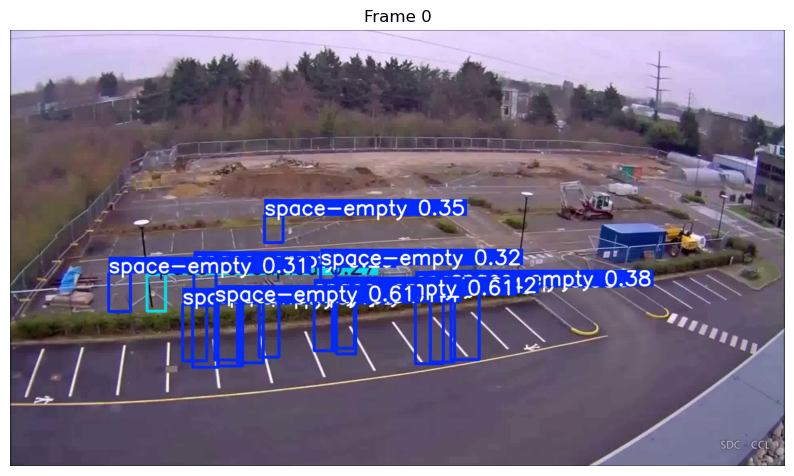

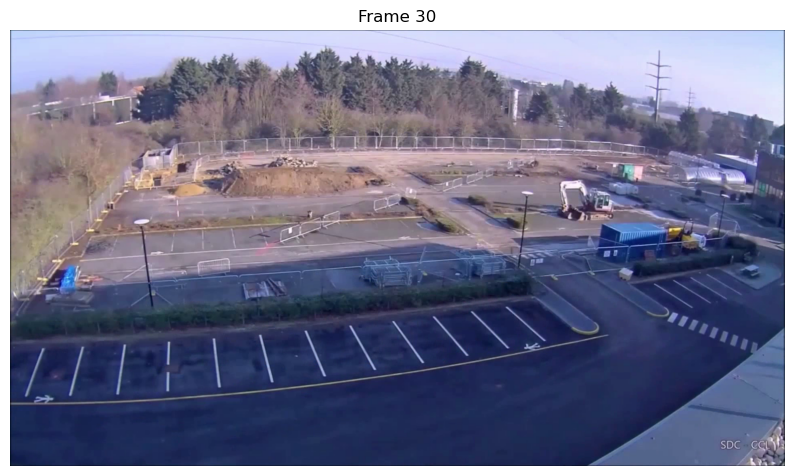

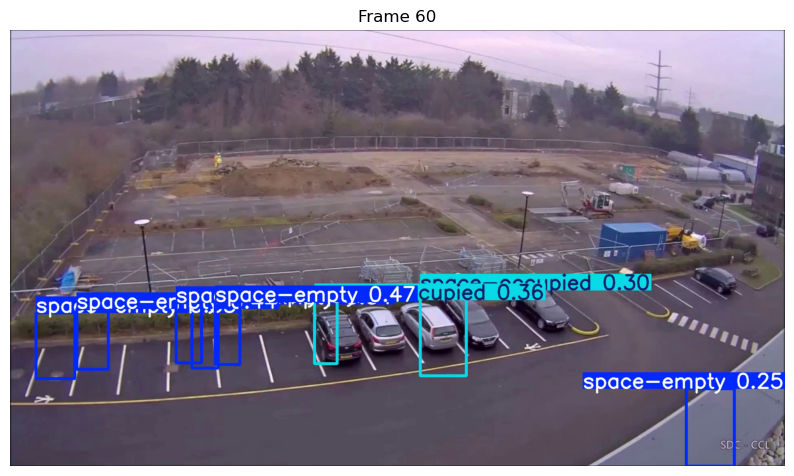

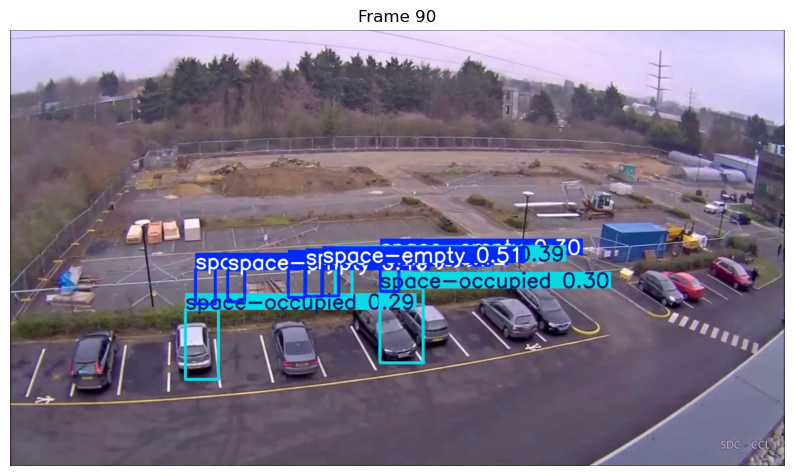

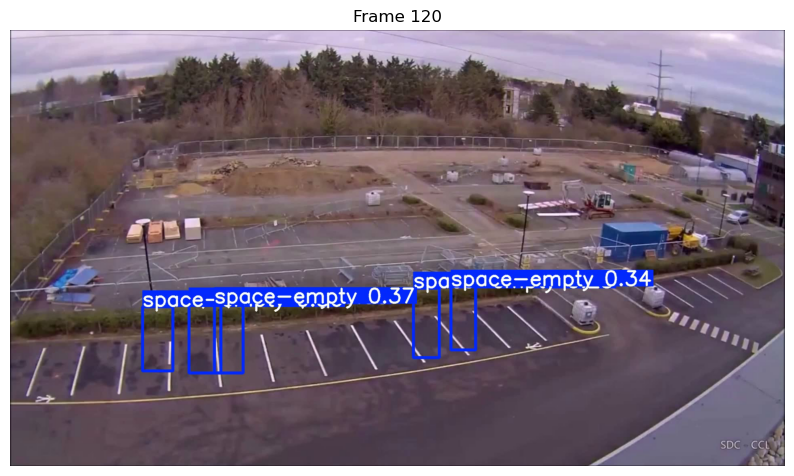

In [10]:
import cv2
import matplotlib.pyplot as plt

video_path = 'output/predicted_video2.mp4'
cap = cv2.VideoCapture(video_path)

frame_rate = 30 
frame_count = 0
shown_frames = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_rate == 0:
        # Convert BGR to RGB for matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 6))
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.title(f'Frame {frame_count}')
        plt.show()
        shown_frames += 1

        if shown_frames >= 5:  # Limit to 5 preview frames
            break

    frame_count += 1

cap.release()

In [2]:
import os
os.startfile('C:/Users/rakshita/parking/output/predicted_video2.mp4')
